## Model lasy drzew decyzyjnych

### 1. Argumenty za przyjęciem modelu lasu drzew decyzyjnych:
- zdolność radzenia sobie z dużą liczbą cech
- ddolność uwzględniania nieliniowych relacji
- duża odporność na nadmierne dopasowanie
- łatwość interpretacji

### 2. Import bibliotek oraz danych z plików .csv

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [18]:
# Wczytanie danych z pliku CSV (X_test.csv, X_train.csv, y_test.csv, y_train.csv)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Wyswietl informacje o danych
print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

X_train shape:  (928, 8) y_train shape:  (928, 1)
X_test shape:  (398, 8) y_test shape:  (398, 1)


### 3. Narysowanie histogramów opisujących częstotliwości występowania poziomów każdej cechy

In [19]:
#definicja metody rysującej diagramy dla kazdej cechy
def draw_frequency_diagram(X_train, X_test):

    #Do celów prezentacji danych łączymy tymaczasowo dane treningowe i testowe w jednym DataFrame
    X_combined = pd.concat([X_train, X_test], ignore_index=True)

    num_columns = X_combined.shape[1]

    # Narysuj histogram
    for i in range(num_columns):
        column_data = X_combined[X_combined.columns[i]] 
        plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
        plt.xlabel(X_combined.columns[i])
        plt.ylabel('Częstotliwość')
        plt.title(f'Histogram dla {X_combined.columns[i]}')
        plt.show()

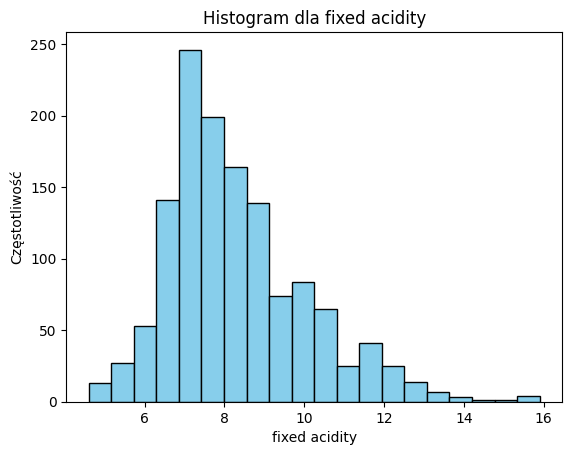

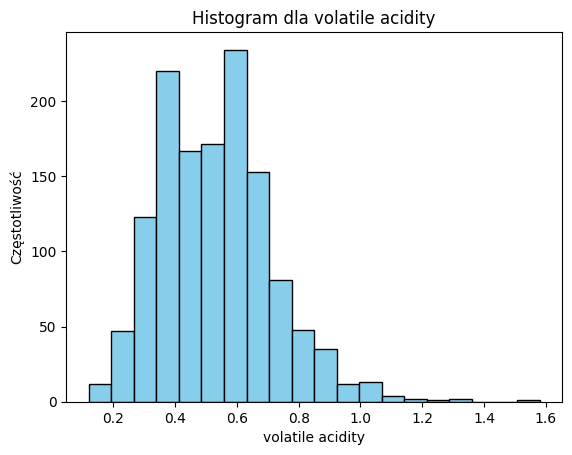

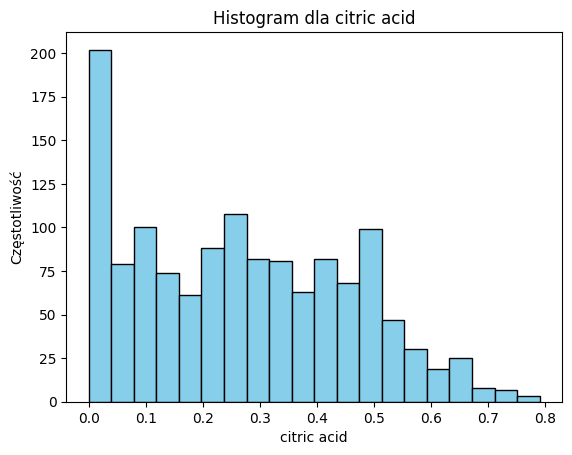

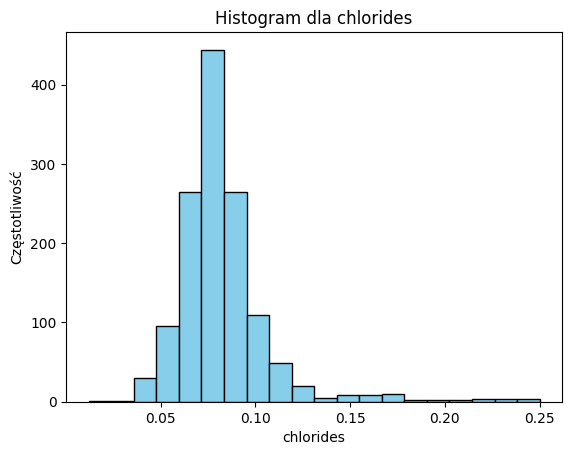

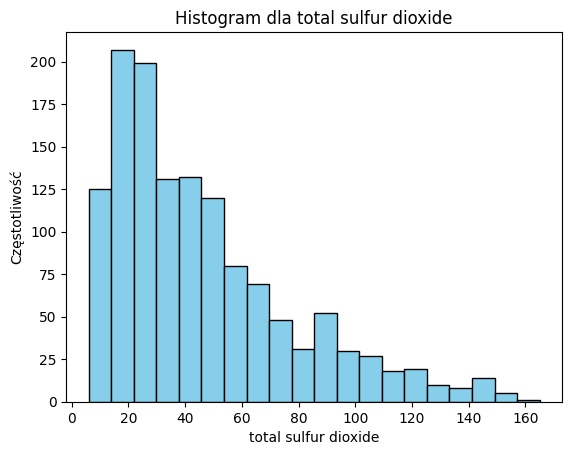

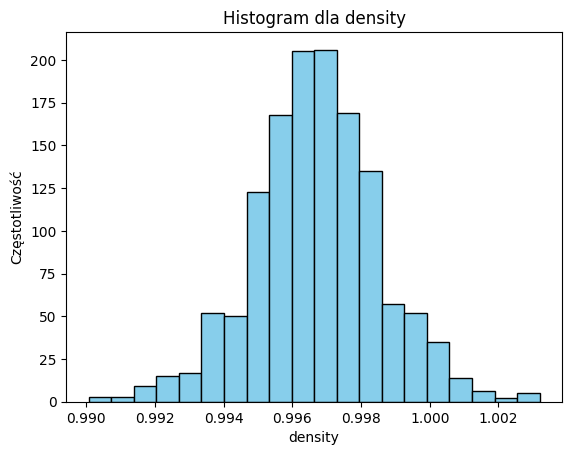

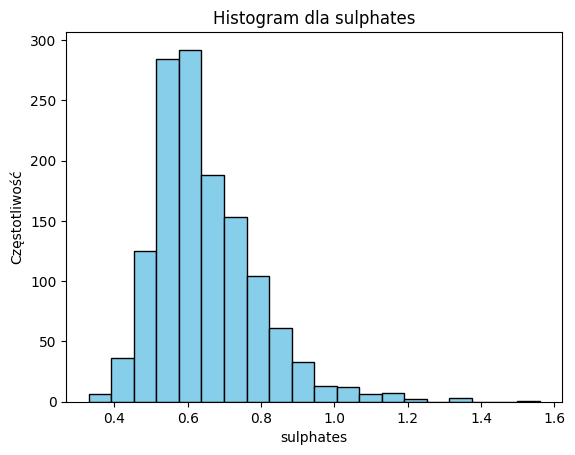

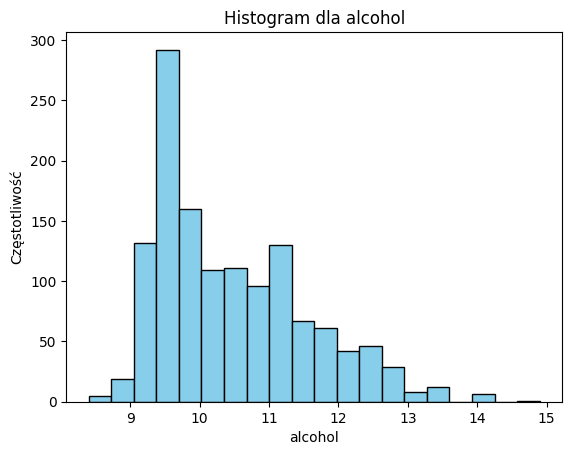

In [20]:
draw_frequency_diagram(X_train, X_test)

### 4. Utworzenie i uczenie modelu

In [21]:
#Utworzenie i trening modelu
rf = RandomForestClassifier(n_estimators=7, random_state=42, max_depth=8)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### 5. Ocena parametrów jakościowych modelu (przed hiperparametryzacją)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Oblicz raport klasyfikacji
report = classification_report(y_test, y_pred)

# Wyświetl raport
print(report)

Accuracy: 0.6055276381909548
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        18
           5       0.69      0.74      0.72       172
           6       0.53      0.64      0.58       151
           7       0.59      0.33      0.42        51
           8       0.00      0.00      0.00         5

    accuracy                           0.61       398
   macro avg       0.30      0.29      0.29       398
weighted avg       0.57      0.61      0.58       398



C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [23]:
#Walidacja krzyżowa
from sklearn.model_selection import cross_val_score
from numpy import mean

cv_scores = cross_val_score(rf, X_test, y_test, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Cross-validation scores: [0.55       0.55       0.5625     0.62025316 0.51898734]
Average cross-validation score: 0.5603481012658229


### 6. Hiperparametryzacja

In [24]:
from sklearn.model_selection import GridSearchCV

#Define the set of hiperparamaters
param_grid = { 
    'n_estimators': range(5, 25), 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': range(5, 12),
} 


# Initialize DecisionTreeClassifier
rf_h = RandomForestClassifier()

# Set up RandomizedSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid) 

# Fit the model
grid_search.fit(X_train, y_train)

#Calculate the best params and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Hyperparameters:", best_score)

C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Best Hyperparameters: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 20}
Best Hyperparameters: 0.6034176111595466


C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### 7. Ponowne uczenie modelu (z uwzglednieniem najlepszych hiperparametrów)

In [25]:
#tworzenie modelu
rf_h = RandomForestClassifier(n_estimators=11, random_state=42, max_depth=5, max_features='sqrt')

#Uczenie modelu
rf_h.fit(X_train, y_train)

#Porównanie ze zbiorem testowym
y_pred_h = rf_h.predict(X_test)

C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### 8. Ocena parametrów jakościowych modelu (po hiperparametryzacji)

In [26]:
accuracy_h = accuracy_score(y_test, y_pred_h)
print("Accuracy:", accuracy_h)

# Oblicz raport klasyfikacji
report_h = classification_report(y_test, y_pred_h)

# Wyświetl raport
print(report_h)

Accuracy: 0.5954773869346733
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        18
           5       0.68      0.74      0.71       172
           6       0.52      0.66      0.58       151
           7       0.53      0.18      0.26        51
           8       0.00      0.00      0.00         5

    accuracy                           0.60       398
   macro avg       0.29      0.26      0.26       398
weighted avg       0.56      0.60      0.56       398



C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [27]:
cv_scores = cross_val_score(rf_h, X_test, y_test, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator,

Cross-validation scores: [0.575      0.6375     0.525      0.59493671 0.59493671]
Average cross-validation score: 0.5854746835443038


Model po hiperparametryzacji nie przyniósł lepszych wyników, jesli sprawdzimy tylko wartość Accuracy. Stosując walidację krzyżową, która jest bardziej rzetelnym sposobem ewaluacji modelu, widzimy jednak, iż model po hiperparametryzacji uzyskał nieco lepszy wynik. W związku z tym, zostanie on użyty na potrzeby dalszych analiz.

### 9. Prezentacja diagramu lasu drzew decyzyjnych
(generacja trwa około 30 sekund, prosze o cierpliwość)

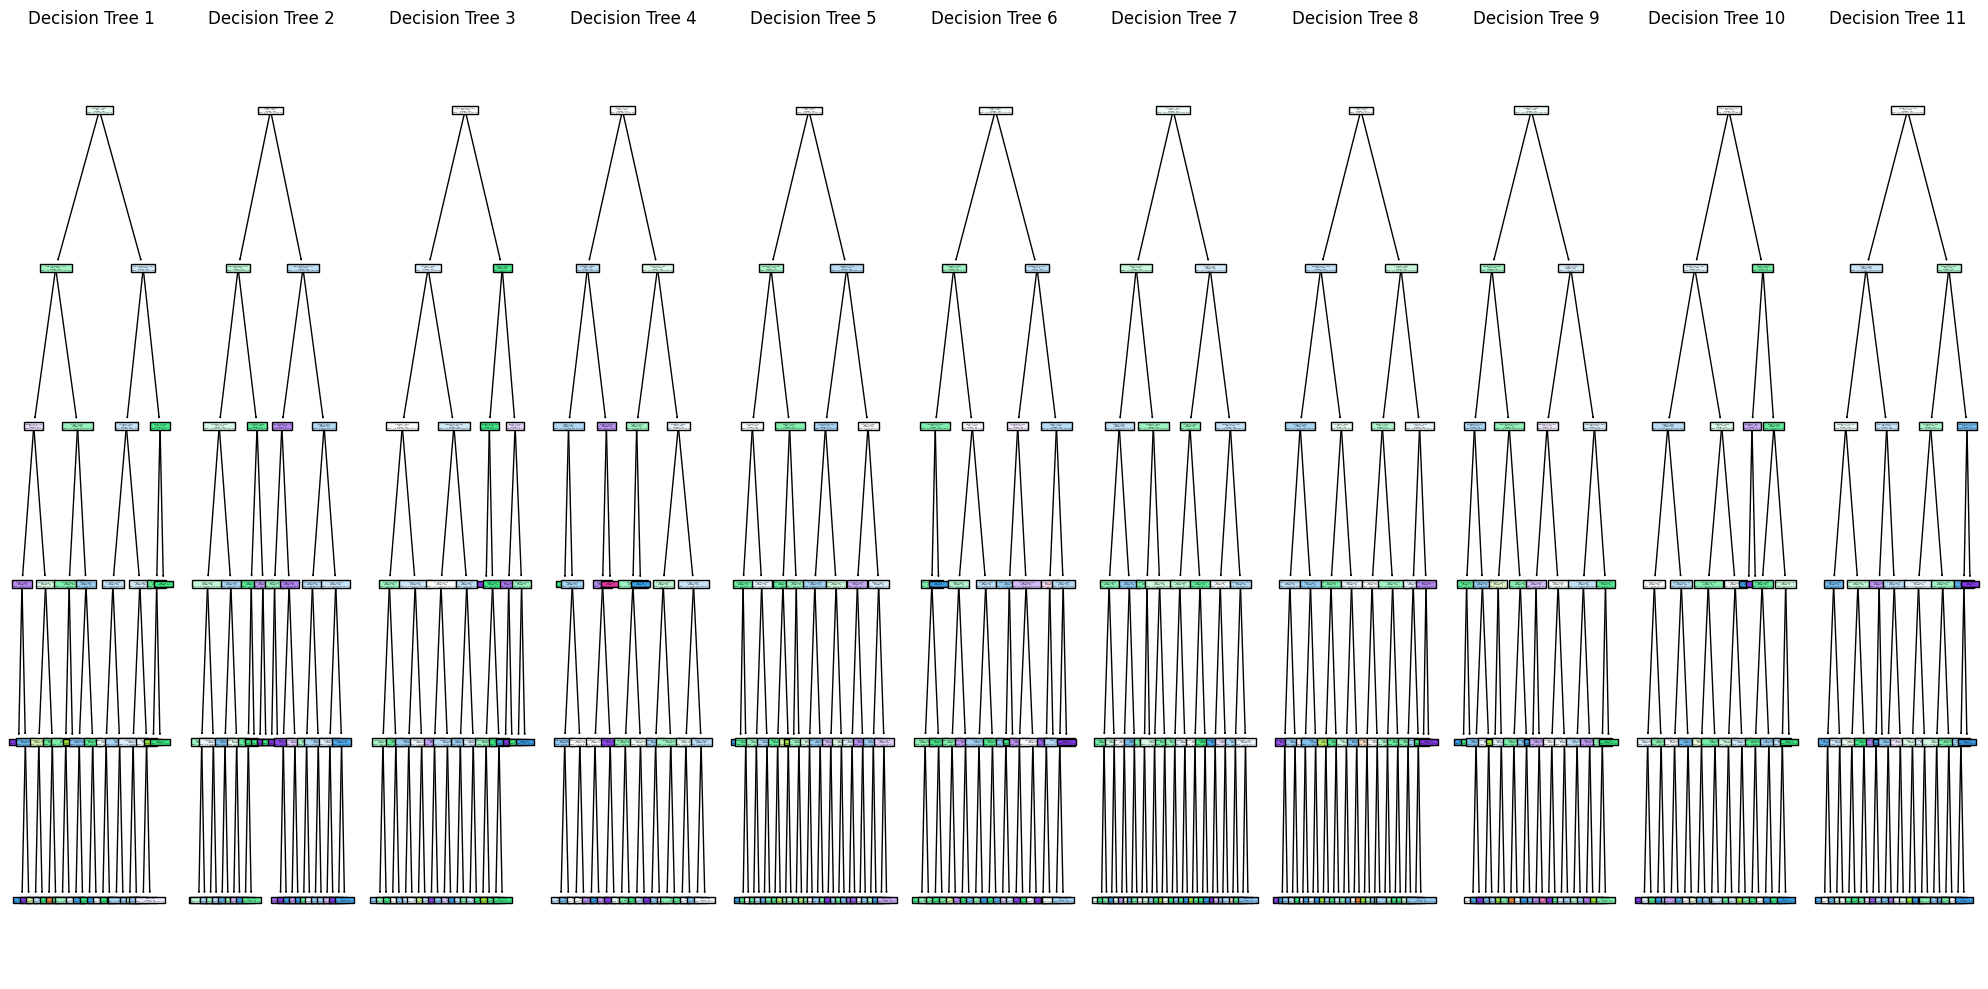

In [30]:
Y_combined = pd.concat([y_train, y_test], ignore_index=True)
class_names = Y_combined['quality'].unique().tolist()
class_names_str = list(map(str, class_names)) 


plt.figure(figsize=(20, 10))
for i in range(len(rf_h.estimators_)):
    plt.subplot(1, len(rf_h.estimators_), i + 1)
    plot_tree(rf_h.estimators_[i], feature_names=X_test.columns.tolist(), class_names=class_names_str, filled=True)
    plt.title(f'Decision Tree {i+1}')

plt.tight_layout()
plt.show()

### 10. Wyświetlenie macierzy pomyłek modelu

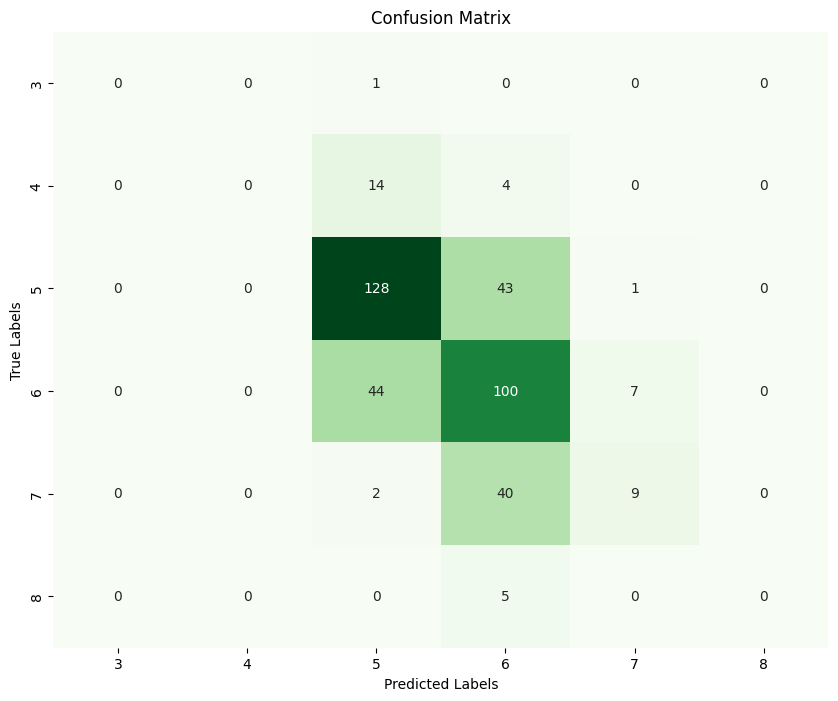

In [32]:
# Tworzenie macierzy pomyłek
cm = confusion_matrix(y_test, y_pred_h)

# Mapowanie indeksów na odpowiadające im oceny wina
labels = ['3', '4', '5', '6', '7', '8',]

# Wyświetlenie macierzy pomyłek
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', cbar=False, xticklabels = labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 11. Podsumowanie

## **Ocena Modelu**

Model pozostawia wiele do życzenia. Ogólna dokładność modelu wynosi w przybliżeniu ~0.6, co nie jest wynikiem powalającym. Sytuacja nie poprawia się, gdy przyjżymy się prezycji oceny poszczególnych poziomów jakości. Okazuje się, że model posiada dość wysoki poziom prezycji jedynie dla oceny jakości 5, a w dodatku nie przewidział *żadnych* poziomów jakości poza 5, 6 i 7. Dodatkowo, model posiada niezadawalająco niski poziom czułości dla oceny jakości 7 oraz miskie oceny F1-score dla poziomów jakości 6 i 7 (nie wspominając nawet o poziomach, do których nie dobrał żadnego przypadku, pomimo ich obecności w wylosowanym zbiorze testowym).

## **Rekomendacje**
- oversampling/undersampling: wina o poziomie jakości 5 i 6 zdecydowanie dominują w danych, co przekłada się na niski wynik precyzji i czułości dla pozostałych poziomów jakości, z których wiele jest całkowicie ignorowane. Wyrównanie liczby przypadków dla każdego poziomu jakości powinna zdecydowanie poprawić wyniki modelu
- inżynieria cech: można ponownie spojrzeć na etap przygotowania danych i zmodyfikować lub połączyć istniejące cechy, a także usunąć te stastystycznie nieistotne, jeśli takowe się zachowały
- wykorzystanie innych modeli: rozważyć można wykorzystanie innych modeli wykorzystywanych do problemów klasyfikacji, takich jak KNN, SVM czy naiwny klasyfikator bayesowski
